# __Analysis of a DFN__

### Problem statement

DFN modelling is based on various data analysis such as fracture density, size distribution, spatial organisation...
<br>
In order to check the consistency of a DFN realisation, one may want to compute some network statistics and indicators, to compare with data.


In this tutorial, we present how you can compute some basic DFN statistics and indicators.


### Theoretical background

Since geological fractures exists at all scales, we usually study their size dsitribution $n(l)$, so that $n(l)dl$ is the number of fractures of sizes between $l$ and $l+dl$, per unit volume.


Moreover, fracture density is a key measure for the characterization of fractured rock mass. There are however several fracture density measures that may be classified according to the dimension of the measurement region, and according to that of the studied fracture attribute  (area, volume ...)  ([Dershowitz and Herda, 1992](https://onepetro.org/ARMAUSRMS/proceedings-abstract/ARMA92/All-ARMA92/ARMA-92-0757/130438)).

We assume the user is familiar with those concepts.


### What will you learn ?
- Compute volumetric fracture densities
- Compute fracture size distribution
- Compute fracture density on geometries

### DFN.Lab model

The required module is __Analysis__.

In [1]:
import dfnlab.Analysis as analysis

______________

### Initialize system

First, we initialize the system, made of a cubic domain of size $100m$, containing a well and a tunnel, and import a DFN from disk file.

In [2]:
import dfnlab.Fractures as dfn
import dfnlab.Domains as dom
import dfnlab.System as sys
import dfnlab.IO as io
import os

system = sys.System()

domain = dom.Domain()
domain.buildParallelepiped(center=[0, 0, 0], L1=100.)
system.setDomain(domain)

fnet = dfn.DFN()
io.load_DFN_file(fnet, os.getcwd()+'/sources/dfnConnectedStructures.disk', format="disk") 
system.setDFN(fnet)

well = dom.Well1D([0,25,50],[0,25,-50])
system.addGeometry(well)

positionTunnel1Begin = [-50.,-25,40]
positionTunnel1End = [50.,-25,40]
tunnel = dom.Tunnel(position1=positionTunnel1Begin, position2=positionTunnel1End, closed=False, diameter=10, index=1)
system.addGeometry(tunnel)

system.build()

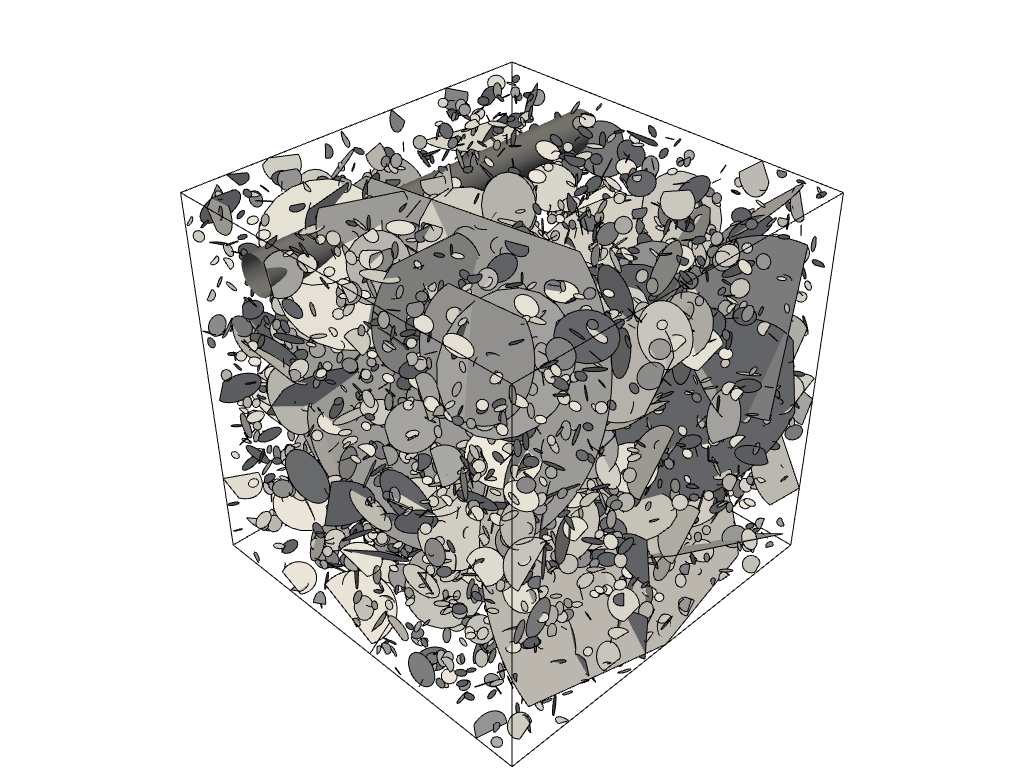

In [3]:
from sources.functions import plot_dfn_and_geometries
plot_dfn_and_geometries(system)

### Get fracture size distribution

The fracture size distribution can be obtained as follow. The user can choose the bin number. By default, the minimum and maximum fracture size in the DFN are used as distribution limits.

In [4]:
analyser = analysis.Analyser(system)

sizeDistribution = analyser.fractureSizeDistribution(bins=30)

The method returns a dictionary.
You may want to save results in a text file.

In [5]:
analysis.Analyser.write_distribution(distribution=sizeDistribution, filename="Tmp/sizeDistribution.txt")

f = open("Tmp/sizeDistribution.txt", 'r')
print (f.read())

cumulated_density_distribution	density_distribution	inter_per_frac	inter_size_per_frac	num	p32	size	size_max	size_min	
0.00488297	0.00421247	0.304498	0.422182	1156	0.0149884	2.12713	2.27141	2.00006	
0.0037399	0.00273209	0.324736	0.506722	853	0.0125141	2.41316	2.57958	2.27141	
0.00289796	0.00186999	0.385542	0.657875	664	0.0110366	2.73966	2.92956	2.57958	
0.0022435	0.00122747	0.454728	0.826858	497	0.00930766	3.10507	3.32702	2.92956	
0.00175563	0.000930737	0.526932	1.10093	427	0.00920611	3.54665	3.77841	3.32702	
0.00133551	0.000629455	0.73716	1.64413	331	0.00801018	4.02257	4.29104	3.77841	
0.00101284	0.000416	0.728745	1.89885	247	0.00682221	4.56632	4.87321	4.29104	
0.00077065	0.000255211	0.91954	2.50987	174	0.00539088	5.18372	5.53437	4.87321	
0.000601914	0.000175042	1.08889	3.28095	135	0.00475218	5.87343	6.28524	5.53437	
0.000470482	0.000118423	1.30097	3.99905	103	0.00413721	6.6633	7.13797	6.28524	
0.000369499	9.61765e-05	1.50515	5.37826	97	0.00432271	7.5648	8.1064	7.13797	
0.000276359	4.

The volumetric fracture size distribution can be plotted as the mean fracture "size" versus the "density_distribution".

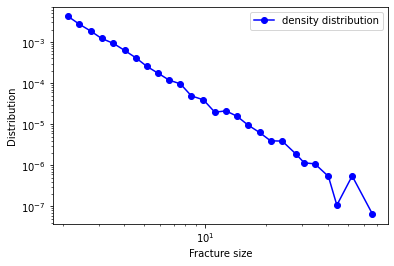

In [6]:
import matplotlib.pyplot as pyplot
fig = pyplot.figure()
ax = pyplot.axes()
pyplot.xlabel('Fracture size')
pyplot.ylabel('Distribution')
pyplot.xscale("log")
pyplot.yscale("log")
ax.plot(sizeDistribution["size"],sizeDistribution["density_distribution"],marker='o',color='blue',label="density distribution")
pyplot.legend()
pyplot.show()

### Get volumetric densities



In [7]:
analyser = analysis.Analyser(system)

The number of fracture per unit volume $p_{30}$ is given by:

In [8]:
p30 = analyser.p30()
print('Fracture number per unit volume p30= '+str(p30))

Fracture number per unit volume p30= 0.004883754078160445


The fracture density (total fracture surface per unit volume) $p_{32}$ is given by:

In [9]:
p32 = analyser.p32()
print('Fracture density p32= '+str(p32))

Fracture density p32= 0.11628077409078716


Fracture connectivity may be quantified by the percolation parameter $p$ (fracture excluded volume per unit volume). Considering fractures to be disc-shaped, it can be quantified as cumulated fracture spherical volume, weighted by the included fracture surface ratio $\Pi_{frac}$:

In [10]:
perco = analyser.percolation("pifrac")
print('Percolation parameter p='+str(perco))

Percolation parameter p=4.45873376216863


Or using the equivalent diameter of the fracture (equivalent area):

In [11]:
perco = analyser.percolation("eq_area")
print('Percolation parameter p='+str(perco))

Percolation parameter p=4.208909665668864


[Barker (2018)](https://www.sciencedirect.com/science/article/pii/S0098300417302194) also proposes a measure adapted for fracture mixed-shapes and sizes.

In [12]:
perco = analyser.percolation("barker")
print('Percolation parameter p='+str(perco))

Percolation parameter p=15.433185706623139


### Get well density

It is possible to measure the fracture density $p_{10}$ along a well (number of intersecting fractures per unit length).

In [13]:
p10 = analyser.p10(well)
print('Fracture density in well p10='+str(p10))

Fracture density in well p10=0.08


### Get fracture intersections with a tunnel

You can have access to fracture intersections with any geometries attached to the system. Below we loop through all fracture intersection with the tunnel, and print the maximum sizes.


In [14]:
maxInter=0.
for i in range(0,tunnel.numIntersections()):
    inter = tunnel.getIntersection(i)
    maxInter = max(maxInter,inter.getSize())
print("The maximum fracture intersection size with tunnel is: "+str(maxInter))

The maximum fracture intersection size with tunnel is: 42.94731587303728
